# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

**First**, we need to set up our notebook in the correct directory

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/riveter-test/riveter'

/content/gdrive/MyDrive/riveter-test/riveter


In [ ]:
# Already satisfied from the Lab session
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [4]:
# Check that we have the correct file and are in the correct directory
%ls

 AD_Assignment_2.ipynb    demo-Little-Red-Cap.ipynb   __pycache__/         test
'BTS_short_100 (1).csv'   demo-NYT-Obits.ipynb        riveter-nlp/         test_suite.py
 BTS_short_100.csv        demo-reorganized.ipynb      riveter.py
 data/                    df.csv                      sample_data.csv
 demo.ipynb               __init__.py                 sample_data.gsheet


In [4]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [5]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [7]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):
Low levels of masculinity in male characters has no affect on fanfiction success.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


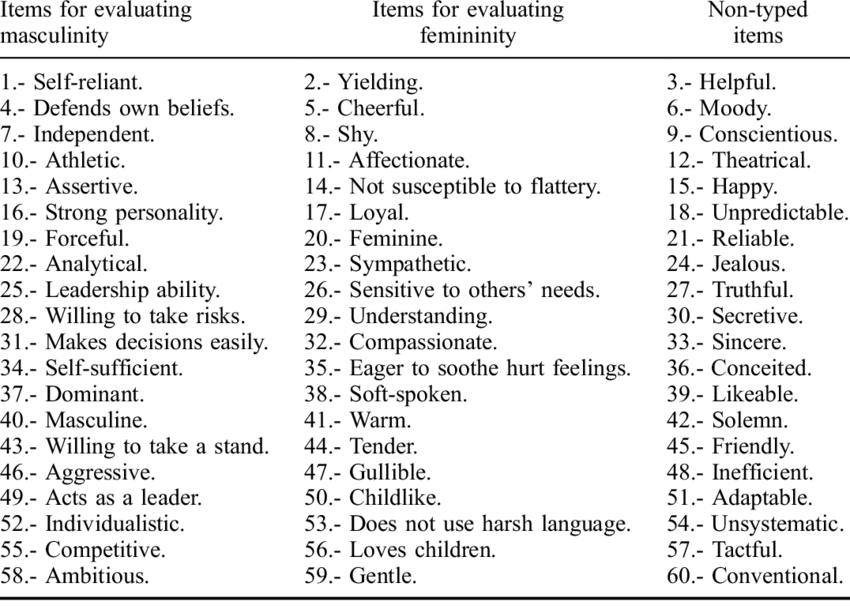

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [12]:
# Need to install the spacy-experimental package for this analysis
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.4 MB/s eta 0:00:00
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached spacy_transformers-1.1.9-py2.py3-none-any.whl (53 kB)
  Using cached spacy_experimental-0.6.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (669 kB)
  Using cached thinc-8.1.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (919 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached pathy-0.11.0-py3-none-any.whl (47 kB)
  Using cached pydantic-1.10.14-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached spacy_alignments-0.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (313 kB)
  Using cached pathlib_abc-0.1.1-py3-none-any.whl (23 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1

In [1]:
!python -m spacy download en_core_web_sm

2024-03-15 14:04:58.244375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 14:04:58.244539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 14:04:58.397681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 14:04:58.704709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 14:05:02.040912: W tensorflow/compiler/tf2

Now we have prepared all the dependencies needed.

In [8]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [9]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [10]:
# Q0 (code): # Initialize Riveter with the lexicon 'power'
riveter = Riveter()
riveter.load_sap_lexicon('power')

# Create an empty dictionary called 'scores_dict'
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [47]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:

    riveter.train(segments,
             text_ids,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})
    # store the computed scores in a dictionary

    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:37<54:54, 37.01s/it]

2024-03-15 14:24:39 Complete!
Story ID: 4706144, Masculine Power Score: 0.09090909090909091



Processing stories:   2%|▏         | 2/90 [01:11<51:49, 35.33s/it]

2024-03-15 14:25:14 Complete!
Story ID: 4752980, Masculine Power Score: 0.25



Processing stories:   3%|▎         | 3/90 [01:40<47:16, 32.60s/it]

2024-03-15 14:25:43 Complete!
Story ID: 4621698, Masculine Power Score: 0.5714285714285714



Processing stories:   4%|▍         | 4/90 [02:13<46:43, 32.59s/it]

2024-03-15 14:26:15 Complete!
Story ID: 3651108, Masculine Power Score: 0.11764705882352941



Processing stories:   6%|▌         | 5/90 [02:50<48:40, 34.36s/it]

2024-03-15 14:26:53 Complete!
Story ID: 5282729, Masculine Power Score: 0.2



Processing stories:   7%|▋         | 6/90 [03:25<48:07, 34.38s/it]

2024-03-15 14:27:27 Complete!
Story ID: 5533886, Masculine Power Score: 0.0



Processing stories:   8%|▊         | 7/90 [03:59<47:47, 34.55s/it]

2024-03-15 14:28:02 Complete!
Story ID: 4547622, Masculine Power Score: 0.05714285714285714



Processing stories:   9%|▉         | 8/90 [04:29<44:51, 32.82s/it]

2024-03-15 14:28:31 Complete!
Story ID: 16177508, Masculine Power Score: 0.13333333333333333



Processing stories:  10%|█         | 9/90 [05:03<44:53, 33.26s/it]

2024-03-15 14:29:06 Complete!
Story ID: 15745185, Masculine Power Score: -0.10526315789473684



 33%|███▎      | 1/3 [00:16<00:33, 16.53s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [05:37<44:44, 33.56s/it]

2024-03-15 14:29:40 Complete!
Story ID: 15654528, Masculine Power Score: 0.18604651162790697



Processing stories:  12%|█▏        | 11/90 [06:10<43:52, 33.33s/it]

2024-03-15 14:30:13 Complete!
Story ID: 7448155, Masculine Power Score: 0.325



Processing stories:  13%|█▎        | 12/90 [06:44<43:42, 33.62s/it]

2024-03-15 14:30:47 Complete!
Story ID: 4983847, Masculine Power Score: 0.10344827586206896



Processing stories:  14%|█▍        | 13/90 [07:17<42:48, 33.36s/it]

2024-03-15 14:31:20 Complete!
Story ID: 3313118, Masculine Power Score: -0.23333333333333334



Processing stories:  16%|█▌        | 14/90 [07:49<41:37, 32.86s/it]

2024-03-15 14:31:51 Complete!
Story ID: 3290390, Masculine Power Score: -0.10638297872340426



Processing stories:  17%|█▋        | 15/90 [08:26<42:43, 34.18s/it]

2024-03-15 14:32:29 Complete!
Story ID: 36435301, Masculine Power Score: 0.05555555555555555



Processing stories:  18%|█▊        | 16/90 [09:03<43:21, 35.15s/it]

2024-03-15 14:33:06 Complete!
Story ID: 36575491, Masculine Power Score: 0.2631578947368421



Processing stories:  19%|█▉        | 17/90 [09:36<42:03, 34.56s/it]

2024-03-15 14:33:39 Complete!
Story ID: 35225224, Masculine Power Score: 0.24324324324324326



Processing stories:  20%|██        | 18/90 [10:08<40:31, 33.78s/it]

2024-03-15 14:34:11 Complete!
Story ID: 4594527, Masculine Power Score: 0.2222222222222222



Processing stories:  21%|██        | 19/90 [10:38<38:25, 32.48s/it]

2024-03-15 14:34:41 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



Processing stories:  22%|██▏       | 20/90 [11:08<37:05, 31.79s/it]

2024-03-15 14:35:11 Complete!
Story ID: 36408319, Masculine Power Score: 0.15789473684210525



Processing stories:  23%|██▎       | 21/90 [11:45<38:18, 33.31s/it]

2024-03-15 14:35:48 Complete!
Story ID: 35762659, Masculine Power Score: 0.21428571428571427



Processing stories:  24%|██▍       | 22/90 [12:19<38:12, 33.71s/it]

2024-03-15 14:36:22 Complete!
Story ID: 35603194, Masculine Power Score: 0.3684210526315789



Processing stories:  26%|██▌       | 23/90 [12:52<37:21, 33.46s/it]

2024-03-15 14:36:55 Complete!
Story ID: 35344306, Masculine Power Score: 0.1388888888888889



Processing stories:  27%|██▋       | 24/90 [13:21<35:10, 31.98s/it]

2024-03-15 14:37:24 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



Processing stories:  28%|██▊       | 25/90 [13:55<35:23, 32.66s/it]

2024-03-15 14:37:58 Complete!
Story ID: 36064474, Masculine Power Score: 0.1



Processing stories:  29%|██▉       | 26/90 [14:30<35:34, 33.35s/it]

2024-03-15 14:38:33 Complete!
Story ID: 36024820, Masculine Power Score: 0.16666666666666666



Processing stories:  30%|███       | 27/90 [15:08<36:31, 34.79s/it]

2024-03-15 14:39:11 Complete!
Story ID: 35182330, Masculine Power Score: 0.06818181818181818



Processing stories:  31%|███       | 28/90 [15:44<36:20, 35.17s/it]

2024-03-15 14:39:47 Complete!
Story ID: 36567496, Masculine Power Score: 0.21052631578947367



Processing stories:  32%|███▏      | 29/90 [16:17<35:06, 34.53s/it]

2024-03-15 14:40:20 Complete!
Story ID: 35560330, Masculine Power Score: 0.13333333333333333



Processing stories:  33%|███▎      | 30/90 [16:56<35:38, 35.64s/it]

2024-03-15 14:40:58 Complete!
Story ID: 35877496, Masculine Power Score: 0.125



Processing stories:  34%|███▍      | 31/90 [17:30<34:41, 35.27s/it]

2024-03-15 14:41:33 Complete!
Story ID: 35957410, Masculine Power Score: 0.2857142857142857



Processing stories:  36%|███▌      | 32/90 [18:03<33:22, 34.53s/it]

2024-03-15 14:42:06 Complete!
Story ID: 30947654, Masculine Power Score: 0.04



Processing stories:  37%|███▋      | 33/90 [18:39<33:10, 34.93s/it]

2024-03-15 14:42:41 Complete!
Story ID: 36332707, Masculine Power Score: -0.09523809523809523



Processing stories:  38%|███▊      | 34/90 [19:20<34:29, 36.96s/it]

2024-03-15 14:43:23 Complete!
Story ID: 35967940, Masculine Power Score: 0.16071428571428573



Processing stories:  39%|███▉      | 35/90 [19:55<33:15, 36.28s/it]

2024-03-15 14:43:58 Complete!
Story ID: 35001073, Masculine Power Score: 0.05



Processing stories:  40%|████      | 36/90 [20:33<33:00, 36.68s/it]

2024-03-15 14:44:35 Complete!
Story ID: 35138911, Masculine Power Score: 0.1388888888888889



Processing stories:  41%|████      | 37/90 [21:10<32:38, 36.95s/it]

2024-03-15 14:45:13 Complete!
Story ID: 35280397, Masculine Power Score: 0.22727272727272727



Processing stories:  42%|████▏     | 38/90 [21:49<32:33, 37.57s/it]

2024-03-15 14:45:52 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708333333333333



Processing stories:  43%|████▎     | 39/90 [22:35<34:08, 40.17s/it]

2024-03-15 14:46:38 Complete!
Story ID: 34995673, Masculine Power Score: 0.16363636363636364



Processing stories:  44%|████▍     | 40/90 [23:18<33:57, 40.74s/it]

2024-03-15 14:47:20 Complete!
Story ID: 33477346, Masculine Power Score: 0.43333333333333335



Processing stories:  46%|████▌     | 41/90 [23:49<31:01, 38.00s/it]

2024-03-15 14:47:52 Complete!
Story ID: 36840832, Masculine Power Score: -0.23076923076923078



Processing stories:  47%|████▋     | 42/90 [24:20<28:37, 35.77s/it]

2024-03-15 14:48:23 Complete!
Story ID: 30896276, Masculine Power Score: 0.14285714285714285



Processing stories:  48%|████▊     | 43/90 [24:54<27:42, 35.36s/it]

2024-03-15 14:48:57 Complete!
Story ID: 37363471, Masculine Power Score: 0.42857142857142855



Processing stories:  49%|████▉     | 44/90 [25:26<26:17, 34.30s/it]

2024-03-15 14:49:29 Complete!
Story ID: 36984901, Masculine Power Score: 0.0



Processing stories:  50%|█████     | 45/90 [26:00<25:38, 34.19s/it]

2024-03-15 14:50:03 Complete!
Story ID: 33353644, Masculine Power Score: -0.05660377358490566



Processing stories:  51%|█████     | 46/90 [26:33<24:54, 33.98s/it]

2024-03-15 14:50:36 Complete!
Story ID: 37002835, Masculine Power Score: -0.14285714285714285



Processing stories:  52%|█████▏    | 47/90 [27:04<23:34, 32.90s/it]

2024-03-15 14:51:07 Complete!
Story ID: 5630824, Masculine Power Score: 0.3157894736842105



Processing stories:  53%|█████▎    | 48/90 [27:38<23:22, 33.40s/it]

2024-03-15 14:51:41 Complete!
Story ID: 10053617, Masculine Power Score: 0.25806451612903225



Processing stories:  54%|█████▍    | 49/90 [28:10<22:29, 32.92s/it]

2024-03-15 14:52:13 Complete!
Story ID: 1572659, Masculine Power Score: 0.23333333333333334



Processing stories:  56%|█████▌    | 50/90 [28:46<22:30, 33.76s/it]

2024-03-15 14:52:49 Complete!
Story ID: 7450573, Masculine Power Score: 0.1



Processing stories:  57%|█████▋    | 51/90 [29:28<23:35, 36.29s/it]

2024-03-15 14:53:31 Complete!
Story ID: 6918676, Masculine Power Score: 0.05263157894736842



Processing stories:  58%|█████▊    | 52/90 [30:10<23:58, 37.86s/it]

2024-03-15 14:54:12 Complete!
Story ID: 6075402, Masculine Power Score: 0.36363636363636365



Processing stories:  59%|█████▉    | 53/90 [30:46<23:04, 37.42s/it]

2024-03-15 14:54:49 Complete!
Story ID: 11101779, Masculine Power Score: 0.3333333333333333



Processing stories:  60%|██████    | 54/90 [31:24<22:38, 37.73s/it]

2024-03-15 14:55:27 Complete!
Story ID: 11321331, Masculine Power Score: 0.08108108108108109



Processing stories:  61%|██████    | 55/90 [31:55<20:48, 35.68s/it]

2024-03-15 14:55:58 Complete!
Story ID: 12284853, Masculine Power Score: 0.022222222222222223



Processing stories:  62%|██████▏   | 56/90 [32:28<19:47, 34.94s/it]

2024-03-15 14:56:31 Complete!
Story ID: 12282003, Masculine Power Score: 0.08888888888888889



Processing stories:  63%|██████▎   | 57/90 [32:59<18:27, 33.57s/it]

2024-03-15 14:57:02 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [33:29<17:22, 32.58s/it]

2024-03-15 14:57:32 Complete!
Story ID: 4228053, Masculine Power Score: 0.21739130434782608



Processing stories:  66%|██████▌   | 59/90 [34:06<17:29, 33.84s/it]

2024-03-15 14:58:09 Complete!
Story ID: 12127317, Masculine Power Score: 0.13513513513513514



Processing stories:  67%|██████▋   | 60/90 [34:35<16:12, 32.43s/it]

2024-03-15 14:58:38 Complete!
Story ID: 12010134, Masculine Power Score: 0.21739130434782608



Processing stories:  68%|██████▊   | 61/90 [35:12<16:17, 33.72s/it]

2024-03-15 14:59:15 Complete!
Story ID: 11510919, Masculine Power Score: 0.4230769230769231



Processing stories:  69%|██████▉   | 62/90 [35:46<15:45, 33.76s/it]

2024-03-15 14:59:48 Complete!
Story ID: 8145802, Masculine Power Score: 0.22727272727272727



Processing stories:  70%|███████   | 63/90 [36:19<15:08, 33.66s/it]

2024-03-15 15:00:22 Complete!
Story ID: 6637942, Masculine Power Score: -0.13043478260869565



Processing stories:  71%|███████   | 64/90 [36:51<14:20, 33.11s/it]

2024-03-15 15:00:54 Complete!
Story ID: 7427905, Masculine Power Score: -0.02702702702702703



Processing stories:  72%|███████▏  | 65/90 [37:23<13:42, 32.89s/it]

2024-03-15 15:01:26 Complete!
Story ID: 3893857, Masculine Power Score: 0.1206896551724138



Processing stories:  73%|███████▎  | 66/90 [37:58<13:24, 33.50s/it]

2024-03-15 15:02:01 Complete!
Story ID: 33040258, Masculine Power Score: 0.25



Processing stories:  74%|███████▍  | 67/90 [38:36<13:18, 34.70s/it]

2024-03-15 15:02:39 Complete!
Story ID: 33858850, Masculine Power Score: -0.16666666666666666



Processing stories:  76%|███████▌  | 68/90 [39:13<12:59, 35.44s/it]

2024-03-15 15:03:16 Complete!
Story ID: 2775776, Masculine Power Score: 0.25



Processing stories:  77%|███████▋  | 69/90 [39:48<12:24, 35.47s/it]

2024-03-15 15:03:51 Complete!
Story ID: 3197963, Masculine Power Score: 0.3



Processing stories:  78%|███████▊  | 70/90 [40:22<11:40, 35.04s/it]

2024-03-15 15:04:25 Complete!
Story ID: 12395199, Masculine Power Score: 0.14634146341463414



Processing stories:  79%|███████▉  | 71/90 [40:55<10:51, 34.30s/it]

2024-03-15 15:04:58 Complete!
Story ID: 10934010, Masculine Power Score: 0.2962962962962963



Processing stories:  80%|████████  | 72/90 [41:26<09:58, 33.24s/it]

2024-03-15 15:05:29 Complete!
Story ID: 12301116, Masculine Power Score: 0.034482758620689655



Processing stories:  81%|████████  | 73/90 [42:01<09:36, 33.90s/it]

2024-03-15 15:06:04 Complete!
Story ID: 12706317, Masculine Power Score: -0.08695652173913043



Processing stories:  82%|████████▏ | 74/90 [42:40<09:26, 35.39s/it]

2024-03-15 15:06:43 Complete!
Story ID: 11499468, Masculine Power Score: 0.06896551724137931



Processing stories:  83%|████████▎ | 75/90 [43:12<08:36, 34.42s/it]

2024-03-15 15:07:15 Complete!
Story ID: 12184146, Masculine Power Score: 0.32



Processing stories:  84%|████████▍ | 76/90 [43:44<07:50, 33.58s/it]

2024-03-15 15:07:47 Complete!
Story ID: 12201333, Masculine Power Score: 0.12



Processing stories:  86%|████████▌ | 77/90 [44:22<07:34, 34.97s/it]

2024-03-15 15:08:25 Complete!
Story ID: 11496030, Masculine Power Score: 0.16



Processing stories:  87%|████████▋ | 78/90 [44:56<06:55, 34.66s/it]

2024-03-15 15:08:59 Complete!
Story ID: 11510277, Masculine Power Score: 0.16216216216216217



Processing stories:  88%|████████▊ | 79/90 [45:35<06:34, 35.86s/it]

2024-03-15 15:09:38 Complete!
Story ID: 10772274, Masculine Power Score: 0.3793103448275862



Processing stories:  89%|████████▉ | 80/90 [46:09<05:52, 35.29s/it]

2024-03-15 15:10:11 Complete!
Story ID: 12646050, Masculine Power Score: 0.041666666666666664



Processing stories:  90%|█████████ | 81/90 [46:40<05:08, 34.23s/it]

2024-03-15 15:10:43 Complete!
Story ID: 11161479, Masculine Power Score: -0.013157894736842105



Processing stories:  91%|█████████ | 82/90 [47:12<04:26, 33.36s/it]

2024-03-15 15:11:15 Complete!
Story ID: 12069936, Masculine Power Score: 0.061224489795918366



Processing stories:  92%|█████████▏| 83/90 [47:45<03:54, 33.43s/it]

2024-03-15 15:11:48 Complete!
Story ID: 12285972, Masculine Power Score: 0.41935483870967744



Processing stories:  93%|█████████▎| 84/90 [48:15<03:14, 32.40s/it]

2024-03-15 15:12:18 Complete!
Story ID: 12372702, Masculine Power Score: -0.03571428571428571



Processing stories:  94%|█████████▍| 85/90 [48:48<02:42, 32.42s/it]

2024-03-15 15:12:51 Complete!
Story ID: 12610496, Masculine Power Score: 0.1



Processing stories:  96%|█████████▌| 86/90 [49:22<02:11, 32.97s/it]

2024-03-15 15:13:25 Complete!
Story ID: 10970472, Masculine Power Score: 0.06060606060606061



Processing stories:  97%|█████████▋| 87/90 [49:52<01:36, 32.02s/it]

2024-03-15 15:13:55 Complete!
Story ID: 12084552, Masculine Power Score: 0.3157894736842105



Processing stories:  98%|█████████▊| 88/90 [50:28<01:06, 33.41s/it]

2024-03-15 15:14:31 Complete!
Story ID: 12727119, Masculine Power Score: 0.017543859649122806



Processing stories:  99%|█████████▉| 89/90 [50:59<00:32, 32.56s/it]

2024-03-15 15:15:02 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [51:30<00:00, 34.34s/it]

2024-03-15 15:15:33 Complete!
Story ID: 10859508, Masculine Power Score: 0.24324324324324326


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.

# Save the dataframe to a CSV file
df.to_csv('/content/gdrive/MyDrive/riveter-test/riveter/df.csv', index=False)

In [64]:
# using the saved version of the dataframe
df = pd.read_csv('df.csv')

In [65]:
# Q2 (code)
df.sample(5)

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
41,30896276,2021,1128,1.0,3.0,Sweeter than sweet\n\nIf there was one thing H...,0.142857,0.390885
23,36695155,2022,1002,1.0,NaN,the wolves within\n\nThe teddy bear on Taehyun...,0.100000,0.385149
60,11510919,2017,1121,712.0,16.0,"Can't Live Without You\n\n""I'm working on a ne...",0.423077,0.331854
5,5533886,2015,1086,553.0,8.0,"Scenic World\n\nAuthor's Note:\n\nUn beta'd, m...",0.000000,0.394316
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571


##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [66]:
!pip install lexicalrichness

In [67]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


In [68]:
import scipy.stats as stats #used for statistical tests
import statsmodels.api as sm # for the OLS regression

In [69]:
# Q3a (code): Check data distribution
#checking if kudos is normally distributed
score_shapiro_kudos, p_val_shapiro_kudos = stats.shapiro(df['kudos'])

if p_val_shapiro_kudos< 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is not significant - normally distributed


array([[<Axes: title={'center': 'kudos'}>]], dtype=object)

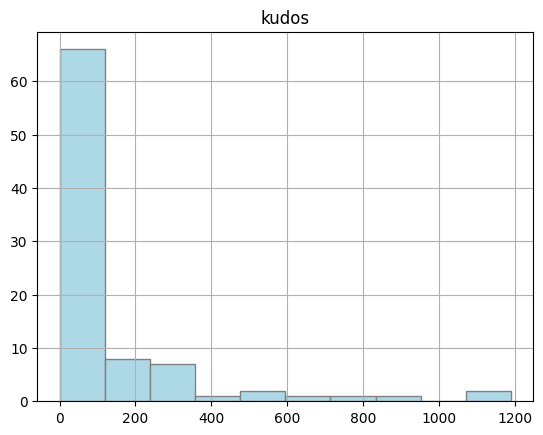

In [70]:
df.hist('kudos', color = 'lightblue', ec = 'grey')

In [71]:
#checking if published_year is normally distributed
score_shapiro_year, p_val_shapiro_year = stats.shapiro(df['published_year'])

if p_val_shapiro_year< 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is significant- not normal distribution


array([[<Axes: title={'center': 'published_year'}>]], dtype=object)

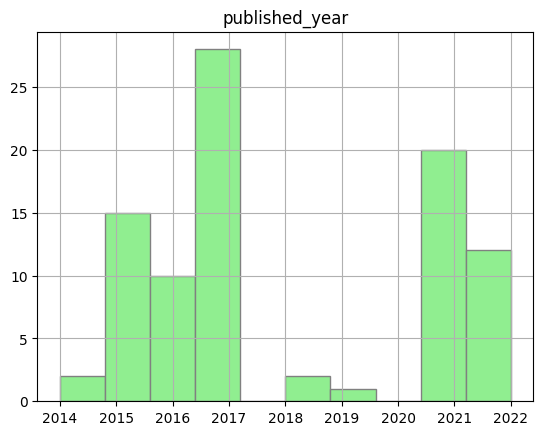

In [72]:
df.hist('published_year', color = 'lightgreen', ec = 'grey')

In [73]:
#checking if masculine score is normally distributed
score_shapiro_masc, p_val_shapiro_masc = stats.shapiro(df['masculine_power_score'])

if p_val_shapiro_masc< 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is not significant - normally distributed


array([[<Axes: title={'center': 'masculine_power_score'}>]], dtype=object)

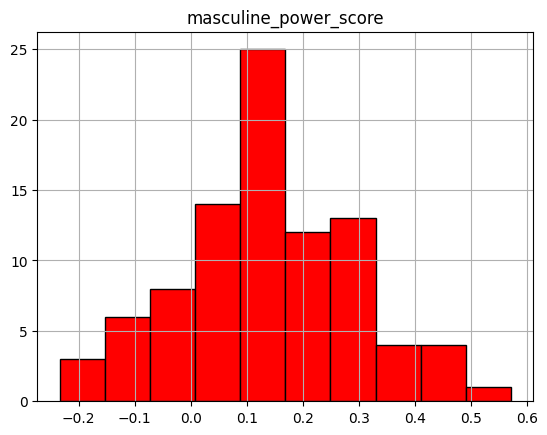

In [74]:
df.hist('masculine_power_score', color = 'red', ec = 'black')

In [75]:
#checking if lexical_richness is normally distributed
score_shapiro_lex, p_val_shapiro_lex = stats.shapiro(df['lexical_richness'])

if p_val_shapiro_lex< 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is significant- not normal distribution


array([[<Axes: title={'center': 'lexical_richness'}>]], dtype=object)

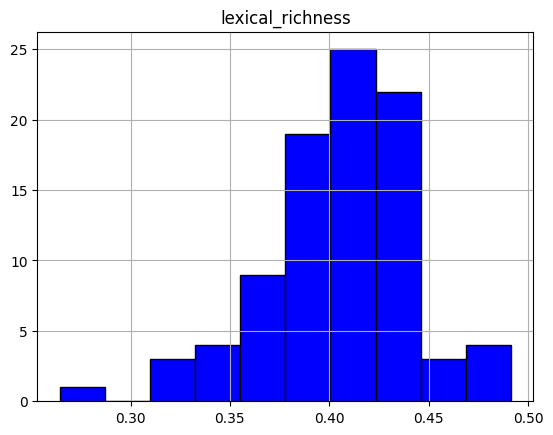

In [76]:
df.hist('lexical_richness', color = 'blue', ec = 'black')

**Now we see that masculinity_score and kudos are normally distributed, but lexical_richness and year are not.**

In [77]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.139553,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.155706,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.233333,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.050658,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.134234,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.243243,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.571429,0.491349


In [78]:
# Q3c (code): Check for any missing values
df.isnull().sum()

story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [79]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df['comments'] = df['comments'].fillna(0)
df['kudos'] = df['kudos'].fillna(0)

df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

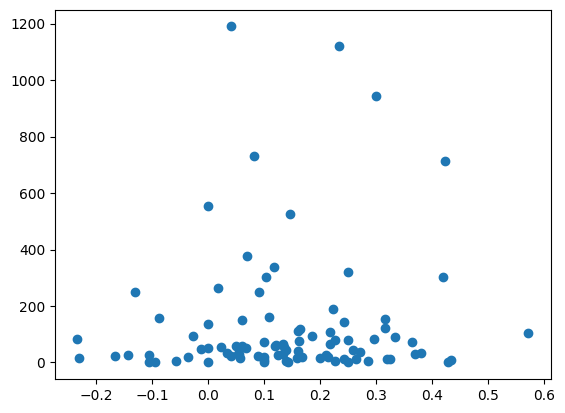

In [80]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
plt.scatter(df['masculine_power_score'], df['kudos'])
plt.show()

**Q5. Multiple Regression and Analysis**

In [81]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary using the
# masculine_power_score, published_year, and lexical_richness as the predictor variables.

y = df['kudos']
X = df[['masculine_power_score', 'published_year', 'lexical_richness']]
X = sm.add_constant(X)
regression = sm.OLS(y, X).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.569
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00154
Time:                        15:20:56   Log-Likelihood:                -608.30
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.987e+04   1.75e+04      3.989      0.000    3.51e+04    1.05e+05
masculine_power_score    66.2565    145.862      0.454      0.651    -223.708     356.221
published_year          -34.6377      8.682     -3.989      0.000     -51.898     -17.377
lexical_richness        385.4343    611.144      0.631      0.530    -829.480    1600.349
==============================================================================
Omnibus:                       75.032   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.148
Skew:                           2.799   Prob(JB):                     7.11e-91
Kurtosis:                      11.909   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q6. Interpret the results of the regression analysis**

# Q6a (words): Interpret the R-squared and Adj. R-squared
The R-squared value is 0.163, which means that around 16.3% of the variance in kudos
can be explained by the independent variables of masculinity power score, year, and lexical richness.
However, the adjusted r-squared value of 0.129 is adjusted based on the
number of predictors in the model (in this case, 4). It decreased because the
predictors improved the model by less than expected and is used to determine
how reliable the correlation actually is.

# Q6b (words): Interpret F-test result
Because the F-statistic probability is 0.00154 and < 0.05 and the F-statistic is rather large at 5.569, it seems to be statistically
significant, so jointly the variables are significant, meaning our model can significantly predict the response.

# Q6c (words): Interpret coefficients and t-test result
The masculine_power_score p-value was not stasitically significant with a p-value of 0.651 which suggests it
does not have an effect on the number of kudos given. Additionally, the coefficient has
a very wide range, which also suggests there is no significant prediction value.

Lexical richness also has a large p-value of 0.530, which suggests it is not stastically significant.

The only variable in this test that had a significant p-value was the published_year with a
p-value of 0.000, which suggests it is significant in predicting the amount of kudos a
particular work is given.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [40]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from sklearn.linear_model import LinearRegression
response = df['kudos']
predictor = df[['masculine_power_score', 'published_year', 'lexical_richness']]

# Instantiate and fit the linear regression model
# Predicting and calculating residuals
model = LinearRegression()
model.fit(predictor, response)
y_pred = model.predict(predictor)
residuals = response - y_pred


# Shapiro-Wilk test
shapiro_test, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {p_value}')

Shapiro-Wilk test p-value: 1.5027972356113084e-12


# Q7b (words): Write your analysis for the Normality Test there:
Because the p-value is less than 0.05, it seems the data is not normally distributed.

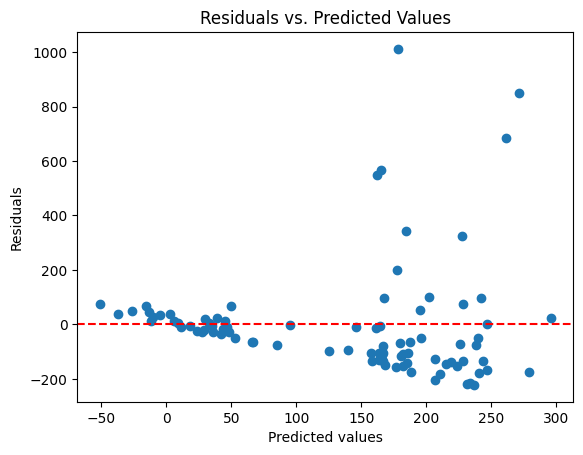

In [46]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

# Q7d (words): Write your analysis for the Homoscedasticity Test here:
Based on the plot of predicted versus residual values, there seems to be slight
unbiased heteroscedasticity, as the plot forms a slight conic shape as it
goes right.

**Q8: Multicollinearity**

In [45]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = predictor.columns
vif_data["VIF"] = [variance_inflation_factor(predictor.values, i) for i in range(len(predictor.columns))]

print(vif_data)

                 feature         VIF
0  masculine_power_score    1.820091
1         published_year  121.605948
2       lexical_richness  122.118546


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

# Q8b (words): Write your analysis for the multicollinearity test here:
Based on the large results for published year and words, it seems they have a strong
correlation and suggest multicollinearity issues. However, as the VIF score for
masculinity is rather low (1.820091), it is fine in terms of multicollinearity
and does not seem to have a very high correlation between the other variables.
It is possible that published year and words may have a strong relationship because
if works are published earlier, there is more time for them to be edited and added onto,
whereas newer published texts may have fewer chapters.  

**Q9: Reflection**

# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
Based on this analysis, here was not enough evidence to say that soft masculinity is an indication of story success.

Overall, the research framework is interesting especially considering the literature regarding reader preferences regarding male characters. However, it could also be interesting to calculate the feminity score for the male characters-- maybe the 'soft masculinity' does not only work by the absence of the dominant words, but also by the presence of words and actions more typically associated with women defined by the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974). However, this categorization may be outdated and possibly an updated version may be better suited to these recently written fanfictions.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.